# ***Income Evaluation ***

Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database.

Prediction task is to determine whether a person makes over 50K a year.

Attribute Information:

Listing of attributes:

50K, <=50K.

age: continuous. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. fnlwgt: continuous. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. education-num: continuous. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. sex: Female, Male. capital-gain: continuous. capital-loss: continuous. hours-per-week: continuous. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import random
import xgboost

Datset from Kaggle : https://www.kaggle.com/lodetomasi1995/income-classification?select=income_evaluation.csv

In [2]:
from google.colab import files
uploaded = files.upload()

Saving income_evaluation.csv to income_evaluation.csv


In [81]:
df = pd.read_csv("income_evaluation.csv")
df.head()#displaying the data set

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.info

<bound method DataFrame.info of        age          workclass   fnlwgt  ...  hours-per-week   native-country  income
0       39          State-gov    77516  ...              40    United-States   <=50K
1       50   Self-emp-not-inc    83311  ...              13    United-States   <=50K
2       38            Private   215646  ...              40    United-States   <=50K
3       53            Private   234721  ...              40    United-States   <=50K
4       28            Private   338409  ...              40             Cuba   <=50K
...    ...                ...      ...  ...             ...              ...     ...
32556   27            Private   257302  ...              38    United-States   <=50K
32557   40            Private   154374  ...              40    United-States    >50K
32558   58            Private   151910  ...              40    United-States   <=50K
32559   22            Private   201490  ...              20    United-States   <=50K
32560   52       Self-emp-inc   2

In [94]:
df=df.apply(lambda x: x.str.strip() if x.dtype == "object" else x) 
df.columns = df.columns.str.strip()#removing whitespaces in the data sets

In [95]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [87]:
df.replace('?',np.NAN,inplace=True) #This data set has missing values as '?' , hence filling '?' with NAN

In [88]:
df.isnull().sum() #missing values found

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

Columns 'workclass', 'occupation', 'native-country' has missing values

In [18]:
df.shape # dataset has  32561 rows and 15 columns

(32561, 15)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


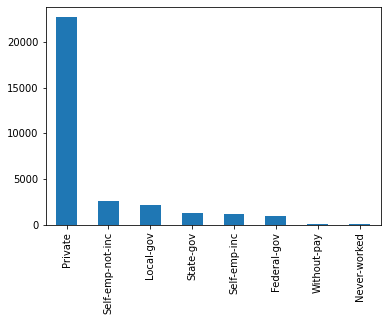

In [20]:
df['workclass'].value_counts().plot.bar()

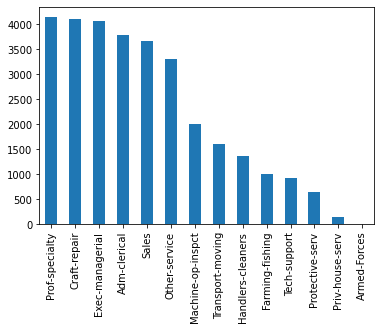

In [21]:
df['occupation'].value_counts().plot.bar()

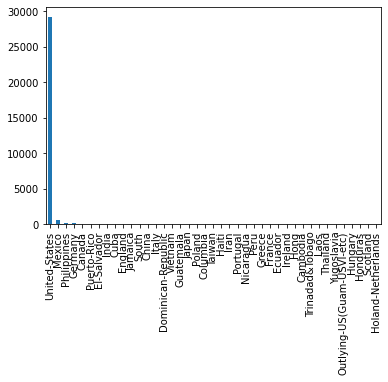

In [22]:
df['native-country'].value_counts().plot.bar()

In [23]:
df['native-country'].isna().mean()

0.0179048555019809

In [24]:
df['workclass'].isna().mean()

0.05638647461687295

In [25]:
df['occupation'].isna().mean()

0.056601455729246644

In [26]:
df['occupation'].mode()

0    Prof-specialty
dtype: object

In [89]:
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()

In [90]:
df['workclass']=imputer.fit_transform(df['workclass'])
df['occupation']=imputer.fit_transform(df['occupation'])
df['native-country']=imputer.fit_transform(df['native-country'])

In [91]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

After imputing the missing values using CategoricalImputer, we could see no more missing values

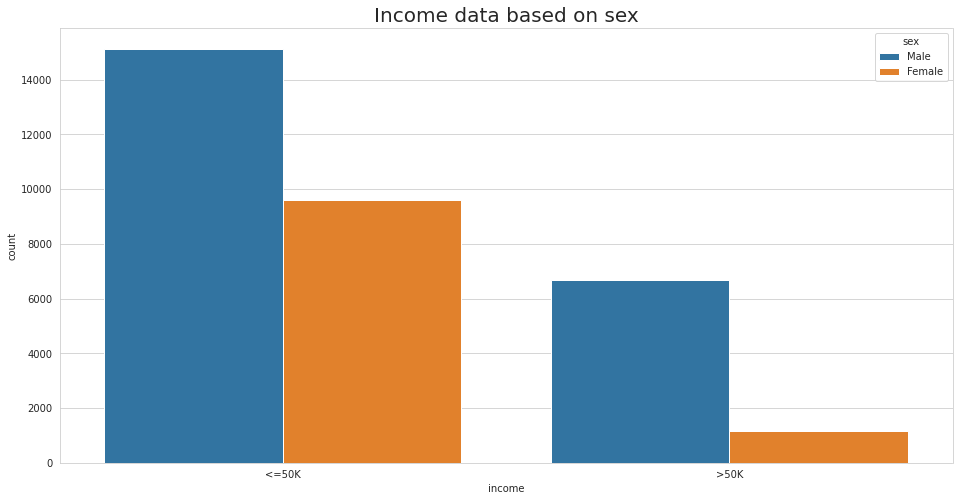

In [50]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(16,8))
plt.title('Income data based on sex', fontsize=20)
sns.countplot(x='income',hue='sex', data = df)
plt.show()

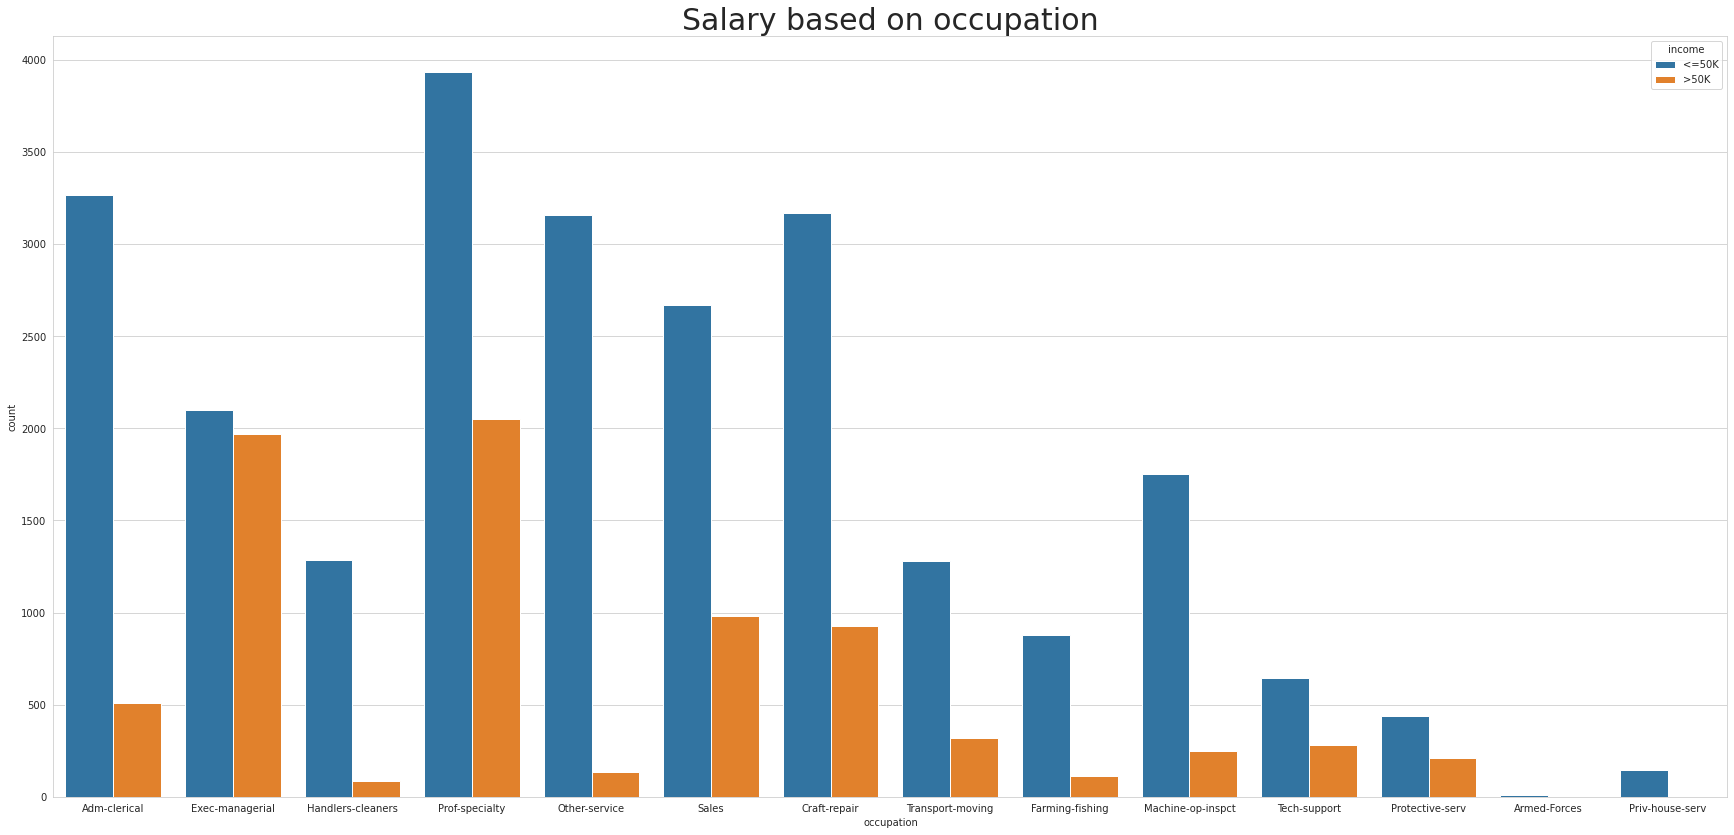

In [49]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(30,14))
plt.title('Salary based on occupation', fontsize=30)
sns.countplot(x='occupation',hue='income', data = df)

plt.show()

We could see Armed-Forces and Private-house servants are not earing more than >50k

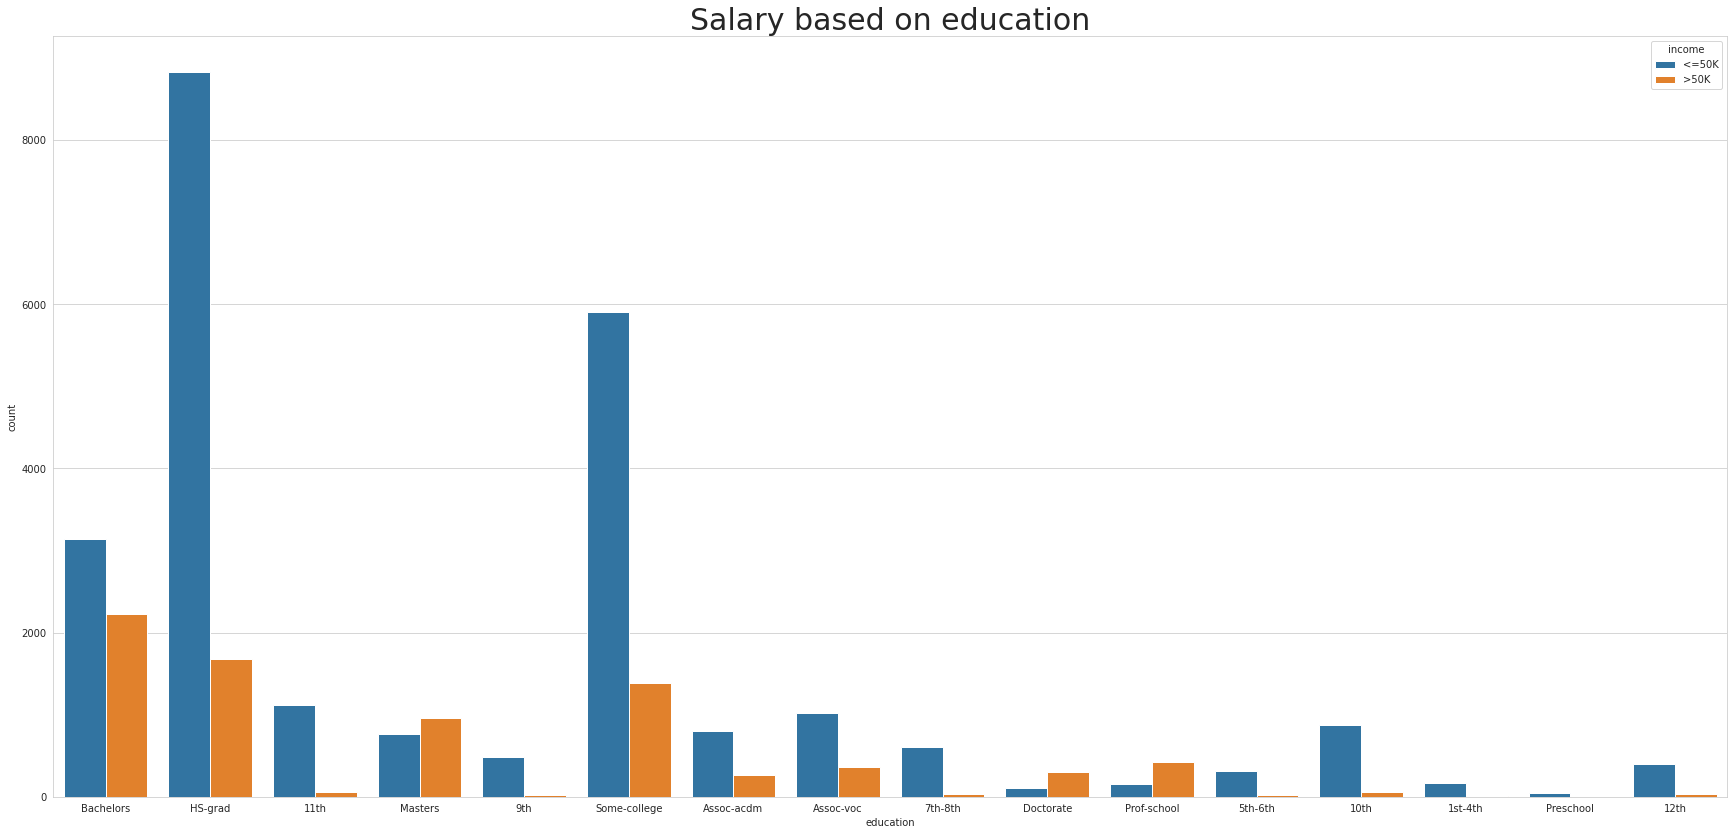

In [41]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(30,14))
plt.title('Salary based on education', fontsize=30)
sns.countplot(x='education',hue='income', data = df)
plt.show()

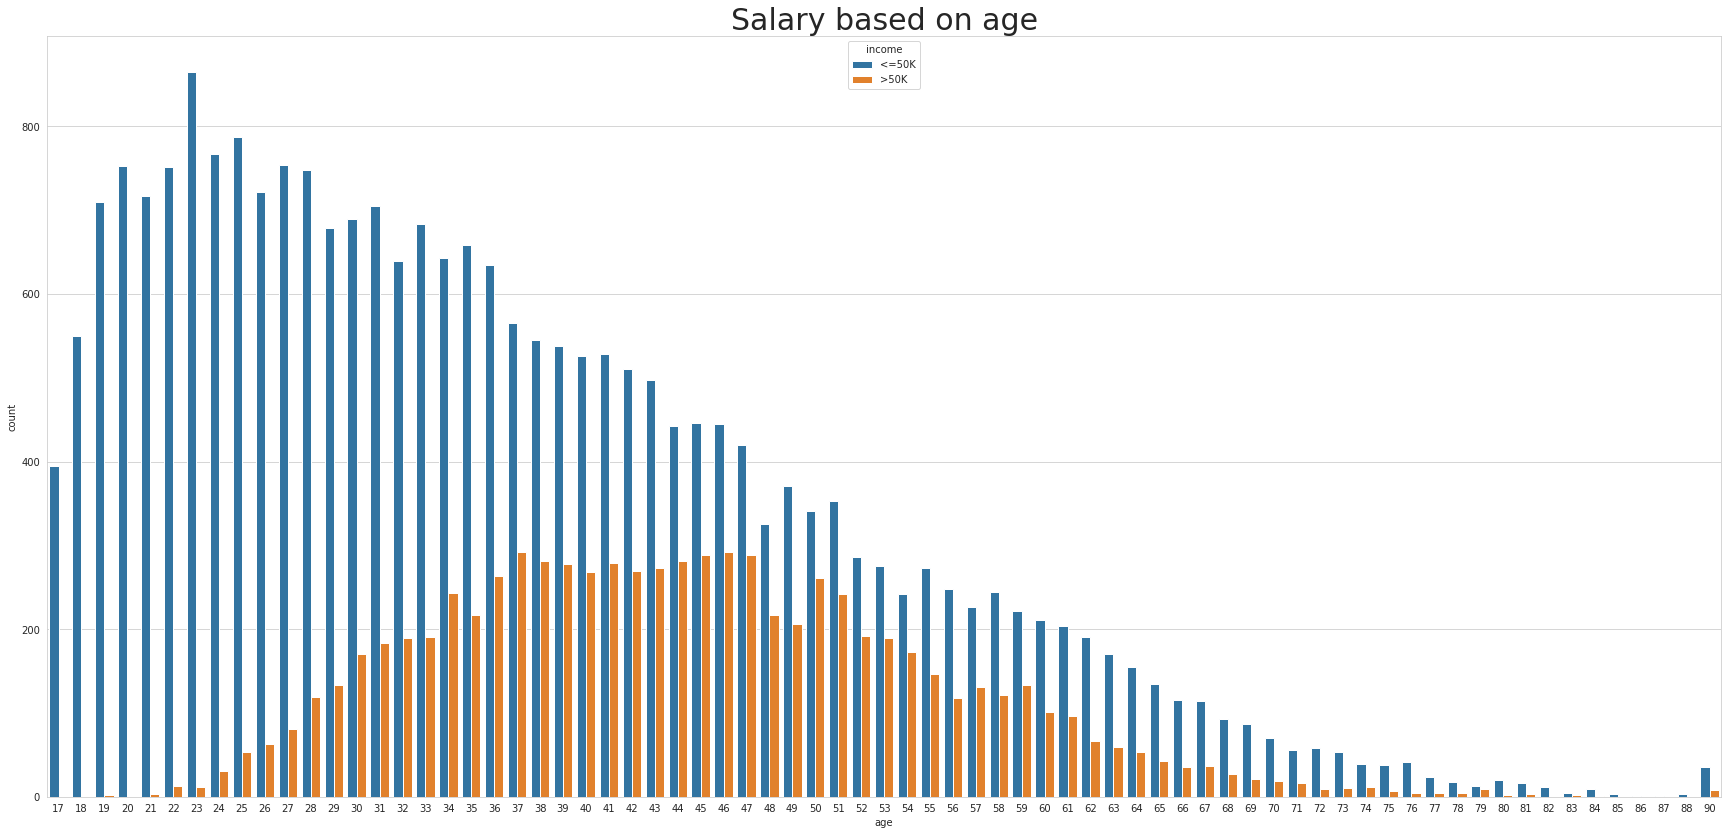

In [77]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(30,14))
plt.title('Salary based on age', fontsize=30)
sns.countplot(x='age',hue='income', data = df)
plt.show()

We could see people with age ranging from 34-50 tend to earn more than 50k

In [71]:
# As the columns which have missing values, they are only categorical, we'll use the categorical imputer
# Importing the categorical imputer
from sklearn_pandas import CategoricalImputer

In [72]:
df['workclass']=imputer.fit_transform(df['workclass'])
df['occupation']=imputer.fit_transform(df['occupation'])
df['native-country']=imputer.fit_transform(df['native-country'])

In [99]:
# we are dropping Columns 'education-num' and  'fnlwgt' since there is no useful information
df.drop(columns=['education-num','fnlwgt'] ,inplace=True)

In [98]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [101]:
# Extracting the categorical columns
cat_df = df.select_dtypes(include=['object']).copy()

In [102]:
cat_df.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [104]:
cat_df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [106]:
# Using the dummy encoding to encode the categorical columns to numericsl ones
for col in cat_df.drop('income',axis=1).columns:
    x=cat_df[col].head(1)
    cat_df= pd.get_dummies(cat_df, columns=[col], prefix = [col], drop_first=True)

In [107]:
cat_df.head()

,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,...,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,<=50K,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,<=50K,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [108]:
# extracting the numerical columns
num_df = df.select_dtypes(include=['int64']).copy()

In [109]:
num_df.head()

,age,capital-gain,capital-loss,hours-per-week
0,39,2174,0,40
1,50,0,0,13
2,38,0,0,40
3,53,0,0,40
4,28,0,0,40


In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(num_df)

In [112]:
scaled_num_df= pd.DataFrame(data=scaled_data, columns=num_df.columns)

In [113]:
scaled_num_df.head()

,age,capital-gain,capital-loss,hours-per-week
0,0.030671,0.148453,-0.21666,-0.035429
1,0.837109,-0.145920,-0.21666,-2.222153
2,-0.042642,-0.145920,-0.21666,-0.035429
3,1.057047,-0.145920,-0.21666,-0.035429
4,-0.775768,-0.145920,-0.21666,-0.035429


In [115]:
# combining the Numerical and categorical dataframes to get the final dataset
final_df=pd.concat([scaled_num_df,cat_df], axis=1)

In [116]:
final_df.head()

,age,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,...,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.030671,0.148453,-0.21666,-0.035429,<=50K,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.837109,-0.145920,-0.21666,-2.222153,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.042642,-0.145920,-0.21666,-0.035429,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1.057047,-0.145920,-0.21666,-0.035429,<=50K,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-0.775768,-0.145920,-0.21666,-0.035429,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [118]:
# separating the feature and target columns
x=final_df.drop('income',axis=1)
y=final_df['income']


In [122]:
y.unique()

array(['<=50K', '>50K'], dtype=object)

In [123]:
y = y.map({'<=50K' : 0, '>50K' : 1})

If we plot the distribution of the target column, we'd find that the peole with less than 50K annual income are more in number than the people with an annual income greaterthan 50K

(array([24720.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7841.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

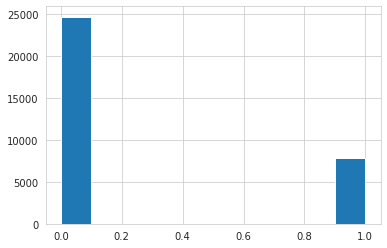

In [124]:
plt.hist(y)

Hence, the dataset is imbalanced. we need to introduce some random sampling to make it balanced.

In [126]:
from imblearn.over_sampling import RandomOverSampler
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_sample(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(array([24720.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 24720.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

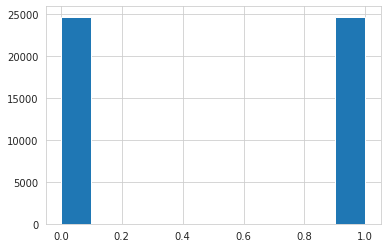

In [127]:
# again plotting the target column
plt.hist(y_sampled)

As shown above, now the data looks to be balanced.

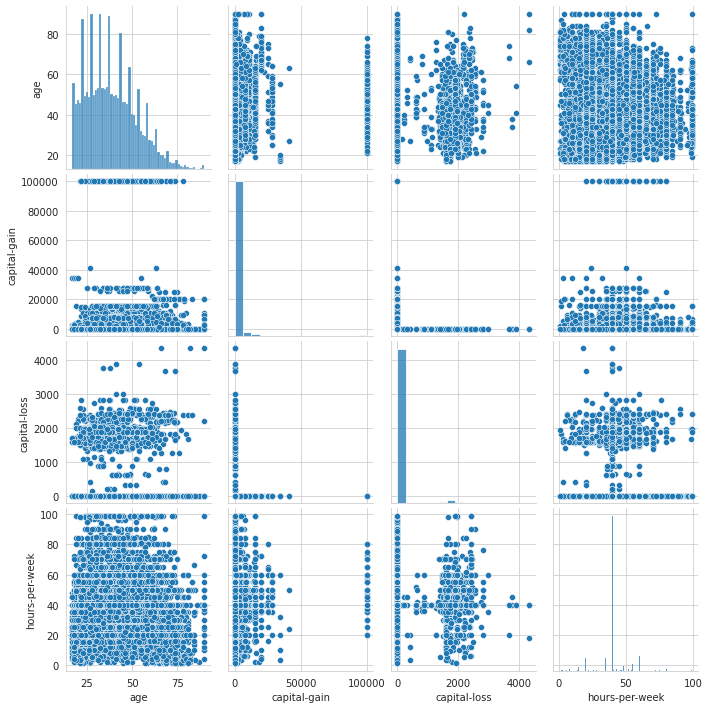

In [128]:
sns.pairplot(df)

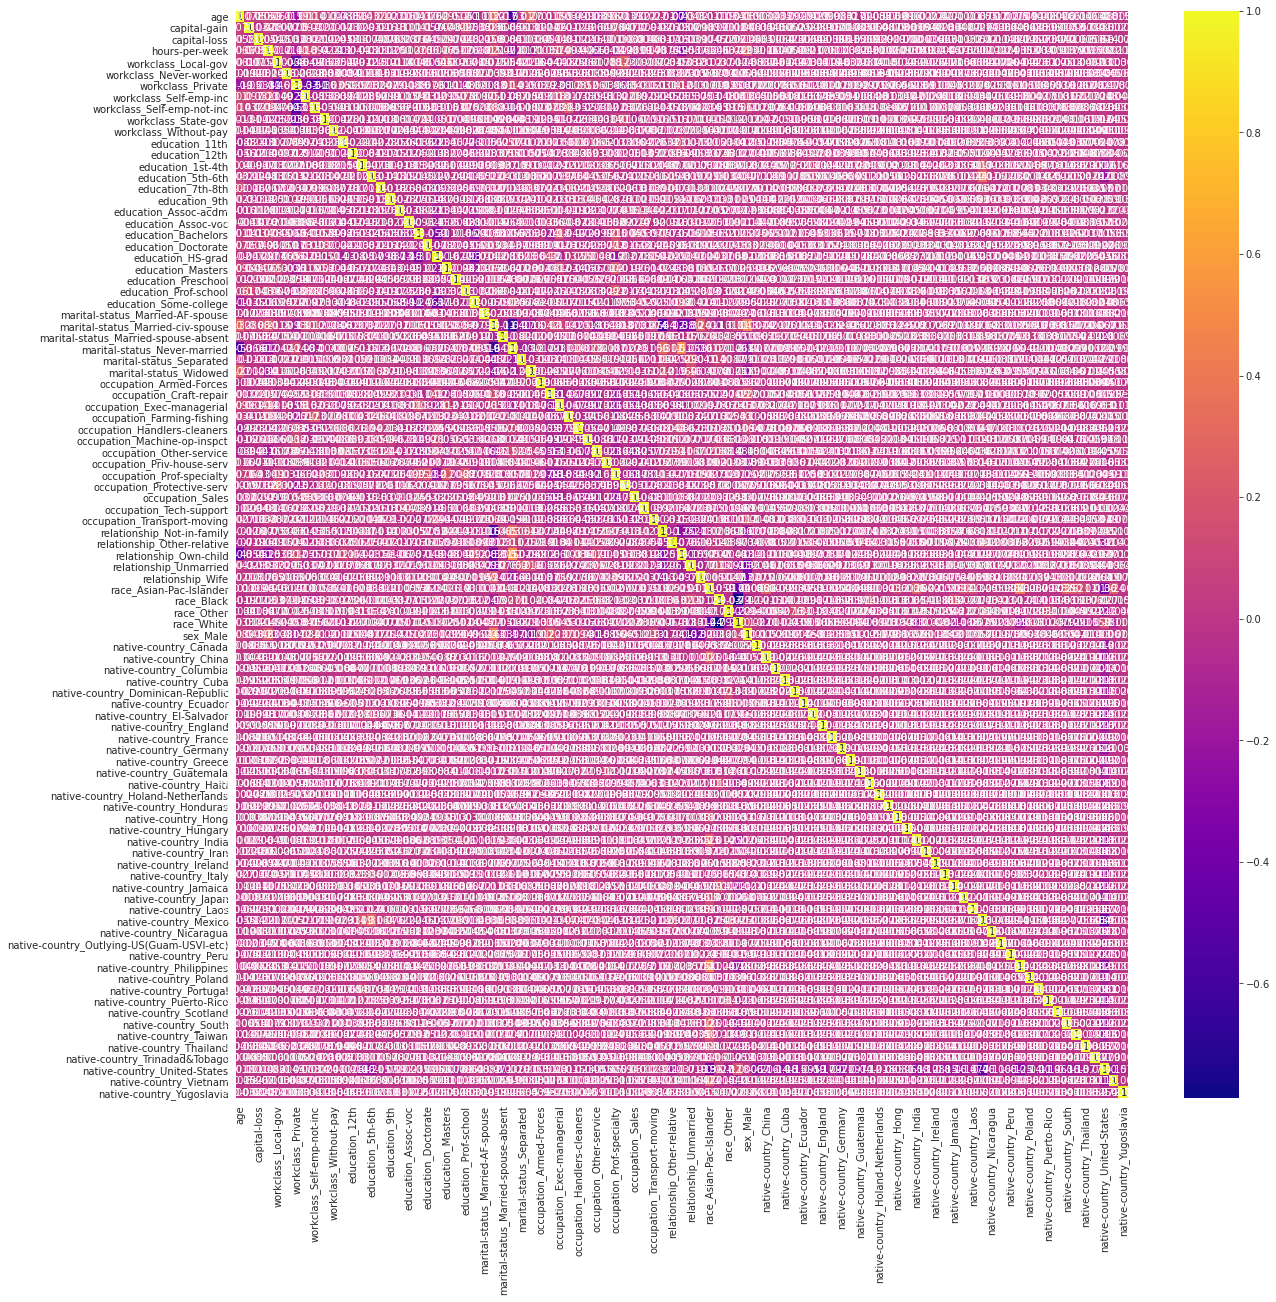

In [130]:
corrmat = x.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(x[top_corr_features].corr(),annot=True,cmap="plasma")

In [131]:
from sklearn.decomposition import PCA

In [132]:
%%time
pca = PCA(n_components=2)
components = pca.fit_transform(x)
components.shape

CPU times: user 414 ms, sys: 434 ms, total: 848 ms
Wall time: 467 ms


In [133]:
componentsDataFrame = pd.DataFrame(components,columns=['component1', 'component2'])

Text(0.5, 1.0, '2D Visualization of data using PCA')

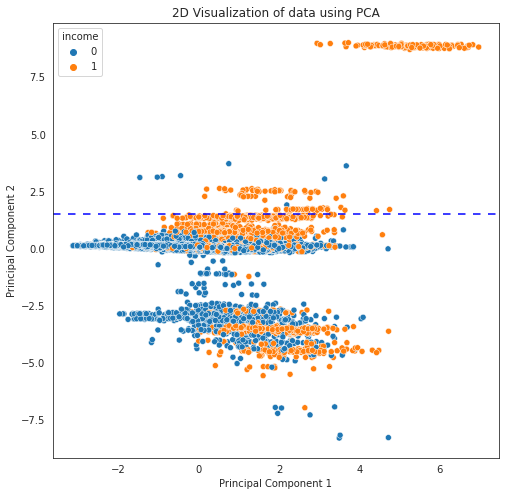

In [134]:
sns.set_style('white')
plt.figure(figsize=(8,8))
sns.scatterplot(x= 'component1', y = 'component2', hue=y, data=componentsDataFrame)
plt.axhline(y=1.5, xmin = 0, xmax = 1, dashes = (5,5), c = 'b')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of data using PCA')

In [135]:
from sklearn.manifold import TSNE

In [138]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [140]:
print("shape of y: ",y.shape)
print("shape of x: ",x.shape)

shape of y:  (32561,)
shape of x:  (32561, 95)


In [141]:
from sklearn.model_selection import train_test_split

In [143]:
X1,X_test,y1,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)
X_train, X_cv, y_train, y_cv = train_test_split(X1,y1,test_size = 0.2, random_state = 10)

In [144]:
print("Number of data points in Train", X_train.shape)
print("Number of data points in Test", X_test.shape)
print("Number of data points in CV", X_cv.shape)

Number of data points in Train (20838, 95)
Number of data points in Test (6513, 95)
Number of data points in CV (5210, 95)


In [145]:
print("Number of data points in Train", y_train.shape)
print("Number of data points in Test", y_test.shape)
print("Number of data points in CV", y_cv.shape)

Number of data points in Train (20838,)
Number of data points in Test (6513,)
Number of data points in CV (5210,)


In [146]:
import numpy as np

In [147]:
np.random.seed(10)
y_pred = np.random.randint(low=0, high=6, size=(X_test.shape[0],))
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5])

In [148]:
y_pred

array([1, 5, 4, ..., 0, 4, 3])

In [149]:
def printPerformace(actual, prediction, string):
  cf = confusion_matrix(actual,prediction)
  plt.figure(figsize=(14,9))
  plt.subplot(2,2,1)
  sns.heatmap(cf,fmt= ".2g", annot=True,xticklabels = True, yticklabels = True)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title("Confusion Matrix for " + string)
  
  plt.subplot(2,2,2)
  colSum = np.sum(cf, axis = 0)
  colSum = colSum.reshape(-1,1)
  PrecisionMatrix = cf/colSum
  sns.heatmap(PrecisionMatrix,fmt= ".2g", annot=True,xticklabels = True, yticklabels = True)  
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title("Precision Matrix for " + string)

  plt.subplot(2,2,3)
  rowSum = np.sum(cf, axis = 1)
  rowSum = rowSum.reshape(1,-1)
  RecallMatrix = cf/rowSum
  sns.heatmap(RecallMatrix,fmt= ".3g", annot=True,xticklabels = True, yticklabels = True)  
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title("Recall Matrix for " + string)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


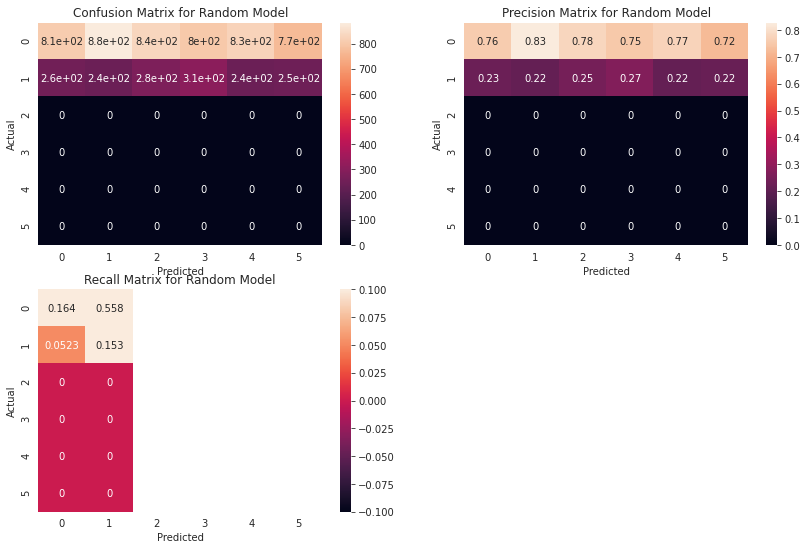

In [150]:
printPerformace(y_test, y_pred, "Random Model")

In [151]:
print("Classification report of Randmo Model")
print(classification_report(y_test, y_pred))
print("Accuracy of Random Model: ", accuracy_score(y_test, y_pred))

Classification report of Randmo Model
              precision    recall  f1-score   support

           0       0.76      0.16      0.27      4929
           1       0.22      0.15      0.18      1584
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.16      6513
   macro avg       0.16      0.05      0.07      6513
weighted avg       0.63      0.16      0.25      6513

Accuracy of Random Model:  0.16167664670658682


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**KNN**

In [152]:
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm

In [158]:
%%time
neighbor = [31,37,41,53,67,87,97,93]
accuracies = []
for k in tqdm(neighbor):
  clfKNN = KNeighborsClassifier(n_neighbors = k)
  clfKNN.fit(X_train,y_train)
  y_predKNN = clfKNN.predict(X_cv)
  accuracies.append(accuracy_score(y_cv, y_predKNN))

100%|██████████| 8/8 [03:09<00:00, 23.65s/it]

CPU times: user 3min 8s, sys: 78.1 ms, total: 3min 8s
Wall time: 3min 9s


In [159]:
bestK = neighbor[accuracies.index(max(accuracies))]
bestK

31

In [155]:
clfKNN = KNeighborsClassifier(n_neighbors = bestK)
clfKNN.fit(X_train,y_train)
y_predKNN = clfKNN.predict(X_test)

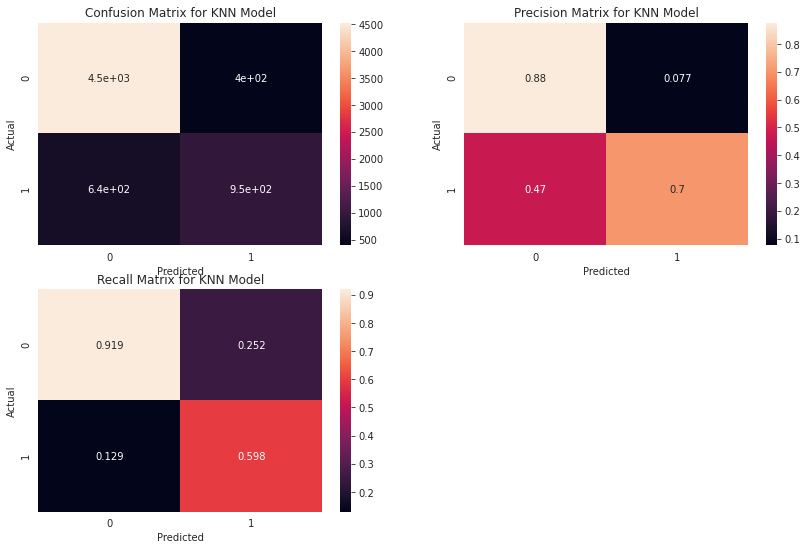

In [156]:
printPerformace(y_test, y_predKNN, "KNN Model")

In [157]:
print("Classification report of KNN Model")
print(classification_report(y_test, y_predKNN))
print("Accuracy of Random Model: ", accuracy_score(y_test, y_predKNN))

Classification report of KNN Model
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4929
           1       0.70      0.60      0.65      1584

    accuracy                           0.84      6513
   macro avg       0.79      0.76      0.77      6513
weighted avg       0.83      0.84      0.84      6513

Accuracy of Random Model:  0.8409335175802242


**LogisticRegression**

In [160]:
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm

In [161]:
%%time
lamda = [10**x for x in range(-4,4,1)]
accuracies = []
for l in tqdm(lamda):
  clfLR = LogisticRegression(penalty = 'l2', C = l, n_jobs=-1)
  clfLR.fit(X_train,y_train)
  y_predLR = clfLR.predict(X_cv)
  acc = accuracy_score(y_cv, y_predLR)
  accuracies.append(acc)

100%|██████████| 8/8 [00:17<00:00,  2.14s/it]

CPU times: user 362 ms, sys: 869 ms, total: 1.23 s
Wall time: 17.2 s


In [162]:
%%time
bestLamda = lamda[accuracies.index(max(accuracies))]
clfLR = LogisticRegression(penalty = 'l2', C = bestLamda, max_iter = 1000, solver = 'liblinear')
clfLR.fit(X_train,y_train)
y_predLR = clfLR.predict(X_test)
print("Final Accuracy: ", accuracy_score(y_test,y_predLR))

Final Accuracy:  0.8453861507753724
CPU times: user 252 ms, sys: 6 ms, total: 258 ms
Wall time: 256 ms


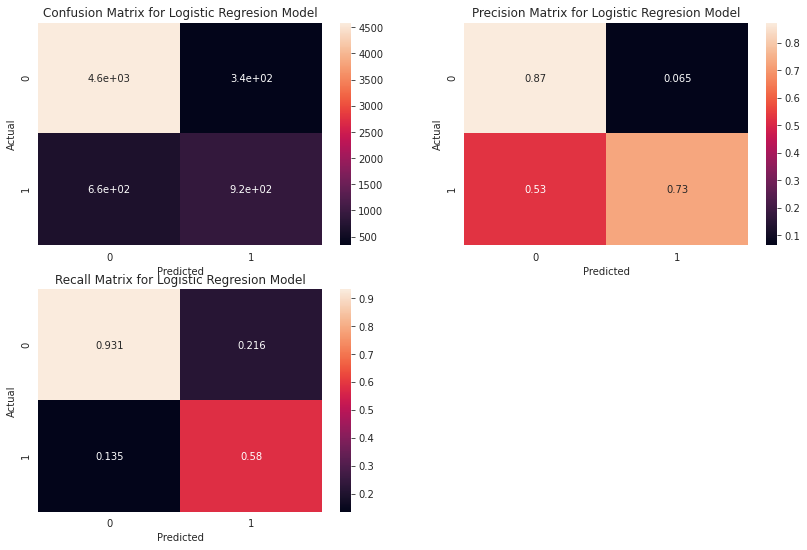

In [163]:
printPerformace(y_test, y_predLR, "Logistic Regresion Model")

In [164]:
print("Classification report of Logistic Regresion Model")
print(classification_report(y_test, y_predLR))
print("Accuracy of Logistic Regresion Model: ", accuracy_score(y_test, y_predLR))

Classification report of Logistic Regresion Model
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4929
           1       0.73      0.58      0.65      1584

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.77      6513
weighted avg       0.84      0.85      0.84      6513

Accuracy of Logistic Regresion Model:  0.8453861507753724


**XGBClassifier**

In [165]:
from xgboost import XGBClassifier
import xgboost as xgb

In [166]:
param = {'eta': 0.1, 'colsample_bytree' : 0.3, 'max_depth': 5, 'objective': 'multi:softmax', 'num_class': 6,
                          'n_estimators':300, 'alpha' : 10, 'silent': True, 'verbose_eval': False }
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix( X_test, y_test)

In [167]:
%%time
num_round = 100
bst = xgb.train(param, dtrain, num_round)

CPU times: user 16.1 s, sys: 57.8 ms, total: 16.2 s
Wall time: 8.33 s


In [168]:
y_predXG = bst.predict(dtest)

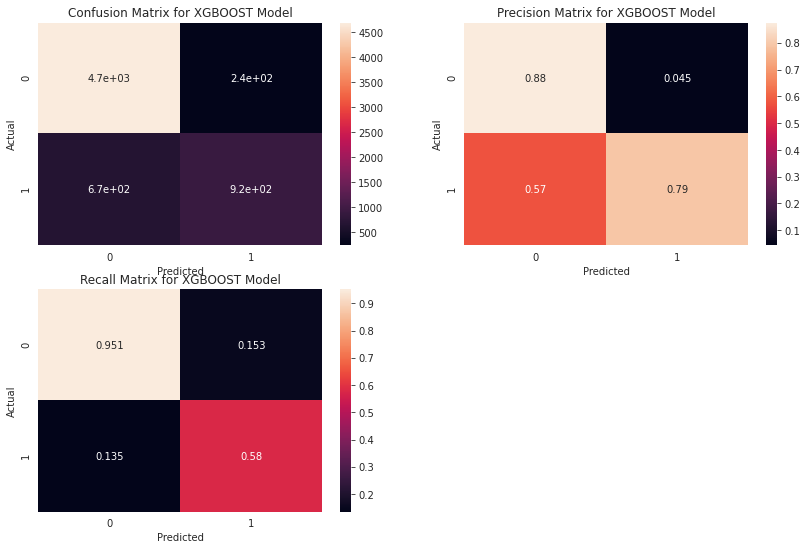

In [169]:
printPerformace(y_test, y_predXG, "XGBOOST Model")

In [170]:
print("Classification report of XGBOOST Model")
print(classification_report(y_test, y_predXG))
print("Accuracy of XGBOOST Model: ", accuracy_score(y_test, y_predXG))

Classification report of XGBOOST Model
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4929
           1       0.79      0.58      0.67      1584

    accuracy                           0.86      6513
   macro avg       0.83      0.77      0.79      6513
weighted avg       0.86      0.86      0.85      6513

Accuracy of XGBOOST Model:  0.860586519269154


**RandomForestClassifier**

In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

In [172]:
%%time
cvAccuracies = []
for estim in tqdm(range(100,500,50)):
    for maxDepth in tqdm(range(10,20,1)):
      clfRF = RandomForestClassifier(n_estimators = estim, max_depth = maxDepth)
      clfRF.fit(X_train, y_train)
      y_predRFcv = clfRF.predict(X_cv)
      cvAcc = accuracy_score(y_cv,y_predRFcv)
      cvAccuracies.append(cvAcc)

100%|██████████| 8/8 [06:45<00:00, 50.73s/it]

CPU times: user 6min 43s, sys: 724 ms, total: 6min 44s
Wall time: 6min 45s


In [177]:
clfRF = RandomForestClassifier(n_estimators = 200)
clfRF.fit(X_train,y_train)
y_predRF = clfRF.predict(X_test)


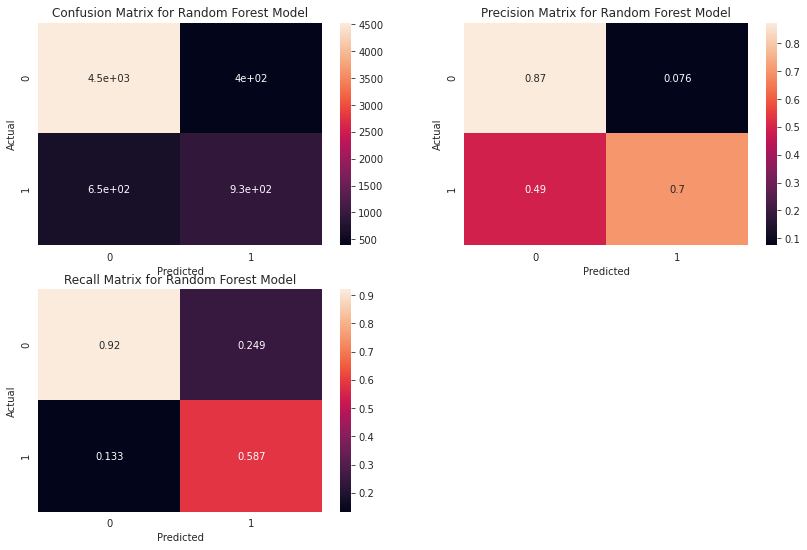

In [178]:
printPerformace(y_test, y_predRF, "Random Forest Model")

In [179]:
print("Classification report of Random Forest Model")
print(classification_report(y_test, y_predRF))
print("Accuracy of Random Forest Model: ", accuracy_score(y_test, y_predRF))

Classification report of Random Forest Model
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4929
           1       0.70      0.59      0.64      1584

    accuracy                           0.84      6513
   macro avg       0.79      0.75      0.77      6513
weighted avg       0.83      0.84      0.83      6513

Accuracy of Random Forest Model:  0.8389375095961922


**DecisionTreeClassifier**

In [183]:
from sklearn.tree import DecisionTreeClassifier

In [184]:
from sklearn.tree import DecisionTreeClassifier

In [185]:
DTparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4,5,7,9,10]
}

In [186]:
clfDT = DecisionTreeClassifier()
gridDT = GridSearchCV(clfDT,param_grid=DTparameters,verbose = 3, n_jobs = -1)
gridDT.fit(X1,y1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [187]:
bestDT = gridDT.best_estimator_
bestDT.fit(X1,y1)
y_predDT = bestDT.predict(X_test)

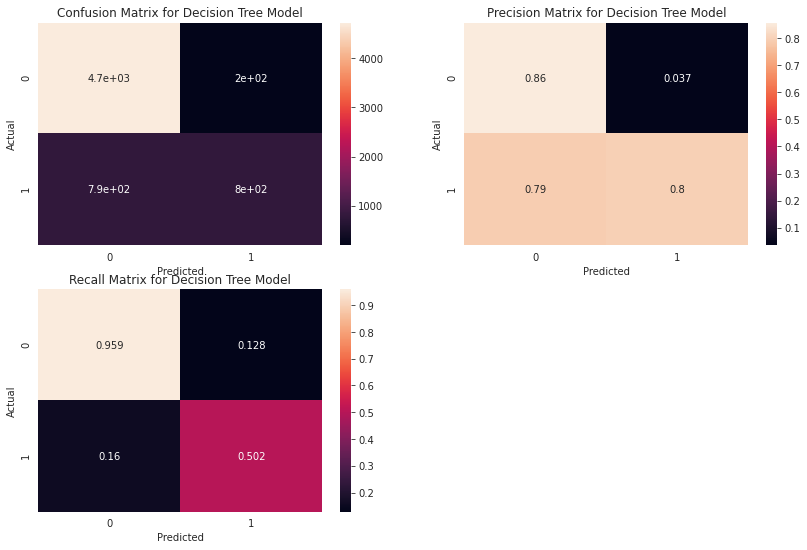

In [188]:
printPerformace(y_test, y_predDT, "Decision Tree Model")

In [189]:
print("Classification report of DT Model")
print(classification_report(y_test, y_predDT))
print("Accuracy of DT Model: ", accuracy_score(y_test, y_predDT))

Classification report of DT Model
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      4929
           1       0.80      0.50      0.62      1584

    accuracy                           0.85      6513
   macro avg       0.83      0.73      0.76      6513
weighted avg       0.84      0.85      0.83      6513

Accuracy of DT Model:  0.8476892369107938


In [192]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [194]:
parameters = {
    'kernel': ['linear','rbf','poly'],
    'degree': [2,3],
    'C': [10**x for x in range(-3,3,1)],
    'gamma': [-0.01, -0.1, 0.0, 0.01, 0.1]
}

In [195]:
%%time
clfSVC = SVC()
GridSVC = GridSearchCV(clfSVC, param_grid=parameters, n_jobs=-1,verbose = 1)
GridSVC.fit(X1,y1)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed: 60.9min
[Parallel(n_jobs=-1)]: Done 462 tasks      | elapsed: 130.0min
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed: 285.2min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 395.8min finished


CPU times: user 1min 13s, sys: 1.02 s, total: 1min 14s
Wall time: 6h 36min 53s


In [196]:
bestSVC = GridSVC.best_estimator_
bestSVC.fit(X1,y1)
y_predSVC = bestSVC.predict(X_test)

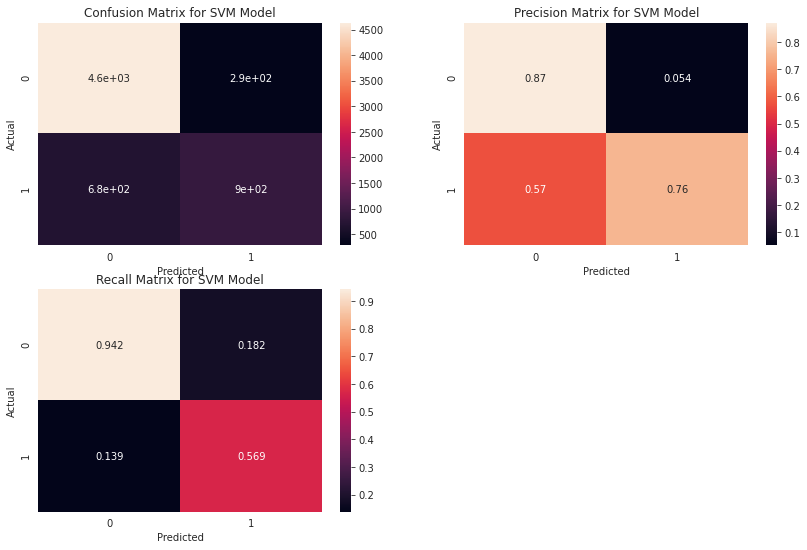

In [197]:
printPerformace(y_test, y_predSVC, "SVM Model")

In [199]:
print("Classification report of SVM Model")
print(classification_report(y_test, y_predSVC))
print("Accuracy of SVM Model: ", accuracy_score(y_test, y_predSVC))

Classification report of SVM Model
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      4929
           1       0.76      0.57      0.65      1584

    accuracy                           0.85      6513
   macro avg       0.81      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513

Accuracy of SVM Model:  0.8509135575003839


## **Final Accuracies**

        Model              Accuracy         Precision
    Random Model             161676           76
    Logistic Regression      84.5386          87
    SVM Classifier           85.0913          87
    Decision Tree            84.7689          86
    Random Forest            83.8937          87
    XGBOOST                  86.0586          88
    KNN                      84.0933          88